In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.40GB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fer2013.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Dropout,Flatten,BatchNormalization,MaxPooling2D,Conv2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_data_dir = '/content/train'
test_data_dir = '/content/test'

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=25,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [29]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [30]:
class_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
img, label = train_generator.__next__()


In [31]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output
model.add(Dense(7, activation='softmax'))

In [32]:
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,872,583 (22.40 MB)

 Trainable params: 5,869,767 (22.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [25]:
# count how many images are both folder (like train and test)
num_train_imgs = 0
for root, dirs, files in os.walk(train_data_dir):
  num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_data_dir):
  num_test_imgs += len(files)

print(num_train_imgs)
print(num_test_imgs)

28709
7178


In [34]:
history = model.fit(
    train_generator,
    steps_per_epoch = num_train_imgs//32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps = num_test_imgs//32
)

Epoch 1/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 51s 43ms/step - accuracy: 0.1920 - loss: 2.5315 - val_accuracy: 0.3001 - val_loss: 1.7449
Epoch 2/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1875 - loss: 1.9279 - val_accuracy: 0.3016 - val_loss: 1.7406
Epoch 3/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.2507 - loss: 1.9199 - val_accuracy: 0.3206 - val_loss: 1.6985
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2812 - loss: 1.5888 - val_accuracy: 0.3291 - val_loss: 1.6810
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.3281 - loss: 1.7038 - val_accuracy: 0.4305 - val_loss: 1.4959
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5000 - loss: 1.4053 - val_accuracy: 0.4301 - val_loss: 1.5019
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - accuracy: 0.4112 - loss: 1.5187 - val_accuracy: 0.4097 - val_loss: 1.5070
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4062 - loss: 1.4892 - val_accu

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

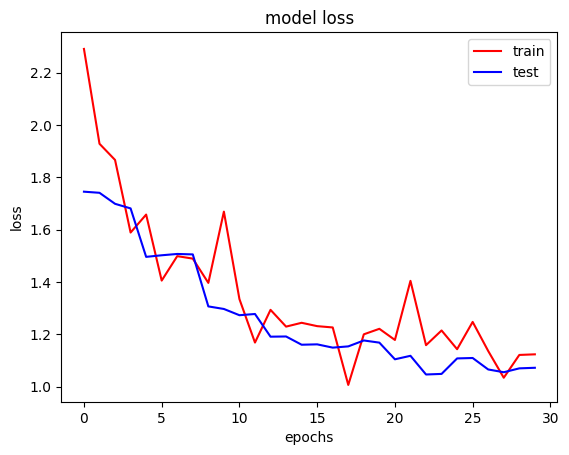

In [39]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.legend(["train","test"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("model loss")
plt.show()

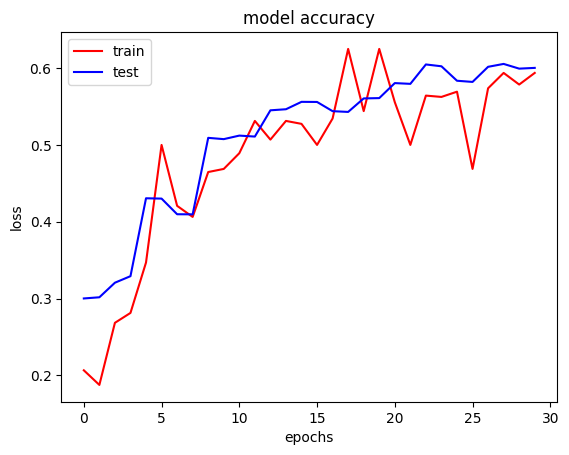

In [38]:
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.legend(["train","test"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("model accuracy")
plt.show()

In [63]:
model.save('emotion_detect_model.h5')

In [64]:
model = load_model('emotion_detect_model.h5')

labels_dict = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}

In [65]:
img = cv2.imread("girl.jpg")

In [66]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [67]:
resized = cv2.resize(gray, (48,48))

In [68]:
normalized = resized / 255.0
reshaped = np.reshape(normalized, (1,48,48,1))

In [69]:
result = model.predict(reshaped)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
[[0.8228608  0.00557135 0.084319   0.06733578 0.00518682 0.00688801
  0.00783834]]


In [70]:
label = np.argmax(result, axis=1)[0]
print(label)

0


In [71]:

print("Predicted Emotion:", labels_dict[label])

Predicted Emotion: Angry
